# Final results for the working memory dataset

In [181]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats as sps
from adjustText import adjust_text

In [182]:
# setting directories
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
atlas_dir = base_dir + '/Atlases'

In [183]:
# Functions
# prepare dataframe for plotting
def prep_df(dataframe, groupby = "cond_name"):
    """
    prepare the region dataframe to do the scatter plot
    gets the mean across subjects (data point) and std of residuals
    THIS ONLY WORKS FOR WM dataset
    Args:
        dataframe (pd.DataFrame) - dataframe with residuals info 
    """
    # group by condition
    grouped = dataframe.groupby([groupby])
    g_means = grouped.agg({'load': 'first',
                       'phase': 'first',
                       'recall': 'first',
                       'X': np.mean,
                       'Y': np.mean})
    
    g_std = grouped.std(numeric_only=True)
    g_means["Y_CI"] = grouped.Y.apply(sps.sem) * 1.96
    g_means["X_CI"] = grouped.X.apply(sps.sem)*1.96
    g_means['err'] = g_std['res']
    
    
    return g_means

# add text labels to points
def annotate(dataframe, text_size = 'small', text_weight = 'regular', labels = "load"):
    """
    annotate data points in the scatterplot
    Args:
    dataframe (pd.DataFrame)
    text_size (str) 
    text_weight (str)
    labels (str) - column of the dataframe that is to be used as label
    """
    texts = []
    for i in range(dataframe.shape[0]):   
        text = plt.text(
                        dataframe.X[i]+0.001, 
                        dataframe.Y[i], 
                        s = dataframe[labels][i],
                        horizontalalignment='left', 
                        size=text_size, 
                        weight=text_weight
                        )
        texts.append(text)

    adjust_text(texts) # make sure you have installed adjust_text


## 1. Plots and test results
investigates the question of linearity

### 1.1 Over the whole cerebellum and cortex

In [134]:
# load the dataframe for the whole 
df_path = os.path.join(base_dir, "WMFS", "sc_df_whole_ses-02.tsv")
df = pd.read_csv(df_path, sep="\t")

# cleaning up (changing ints to strings)
df['phase']   = df['phase'].map({1: 'retriev', 0: 'encode'}) 
df['recall']  = df['recall'].map({1: 'fw', 0: 'bw'}) 
df['load']    = df['load'].map({2:'load2', 4:'load4', 6:'load6'})

# prepare df for plotting
df_preped = prep_df(df, groupby = "cond_name")
# df_preped
    

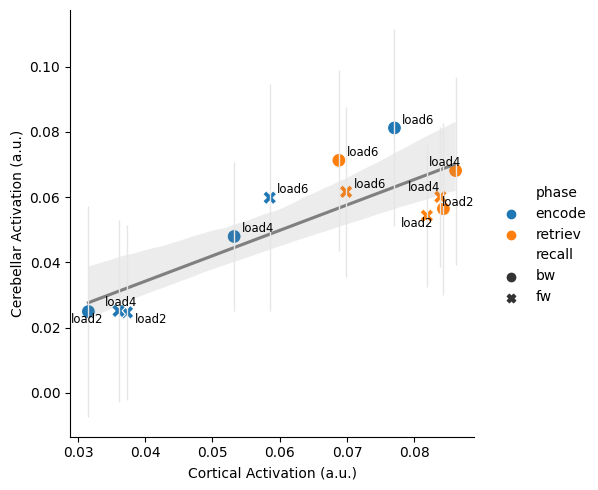

In [184]:
g = sns.FacetGrid(df_preped,  height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="X", y="Y", 
                                 style = "recall", hue = "phase", s = 100)
g.add_legend()
g.map_dataframe(sns.regplot, x="X", y="Y", 
                    fit_reg=True, 
                    scatter_kws={"s": 0}, 
                    line_kws={'label':"Linear Reg", "color": 'grey'})
g.map(plt.errorbar, x = df_preped['X'], 
                    y = df_preped['Y'], 
                    yerr = df_preped['err'],
                    elinewidth=1, 
                    fmt='none',
                    color='grey', 
                    ecolor='0.9'
            )
# set labels
g.set_xlabels('Cortical Activation (a.u.)')
g.set_ylabels('Cerebellar Activation (a.u.)')

# get labels for each data point
annotate(df_preped, text_size = 'small', text_weight = 'regular', labels = "load")

### 1.2 Over region of interests
#### 1.2.1 verbal working memory contrast

#### 1.2.2 Yeo Buckner 7 and 17

### 1.3 Using connectivity models